## Bloco 2 - aprendizado de máquina

1. [Treino, teste e baseline](#treino)
2. [k vizinhos mais próximos (k-NN)](#vizinhos)
3. [Regressão linear](#linear)
4. [Árvore de decisão](#decisao)
5. [Floresta aleatória](#floresta)
6. [Comparando os desempenhos dos modelos de regressão](#comparacao)
7. [Classificação](#class)

---

### <a id="treino">Tarefa 1 - Treino, teste e baseline

Importando os dados dos arquivos:

In [1]:
# Importando as bibliotecas e módulos a serem utilizados para a realização do treino, teste e baseline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
df_data = pd.read_csv('data.csv') #Importando o dataframe do arquivo "data.csv" (o arquivo sem os dados do artigo)
df_data = df_data.drop("Unnamed: 0",axis=1)

In [3]:
df_data_art = pd.read_csv('data_artigo.csv') #Importando o dataframe do arquivo "data_artigo.csv"
df_data_art = df_data_art.drop("Unnamed: 0",axis=1)

In [4]:
# Substituindo os intervalos dos valores das idades para a média, a fim de obter os dados em valores numéricos - para o "data.csv"
df_data['Idade']=df_data['Idade'].replace('20-29',int(25))
df_data['Idade']=df_data['Idade'].replace('30-39',int(35))
df_data['Idade']=df_data['Idade'].replace('40-49',int(45))
df_data['Idade']=df_data['Idade'].replace('50-59',int(55))
df_data['Idade']=df_data['Idade'].replace('60-69',int(65))
df_data['Idade']=df_data['Idade'].replace('70-79',int(75))

In [5]:
# Substituindo os intervalos dos valores das idades para a média, a fim de obter os dados em valores numéricos - para o "data_artigo.csv"
df_data_art['Idade']=df_data_art['Idade'].replace('20-29',int(25))
df_data_art['Idade']=df_data_art['Idade'].replace('30-39',int(35))
df_data_art['Idade']=df_data_art['Idade'].replace('40-49',int(45))
df_data_art['Idade']=df_data_art['Idade'].replace('50-59',int(55))
df_data_art['Idade']=df_data_art['Idade'].replace('60-69',int(65))
df_data_art['Idade']=df_data_art['Idade'].replace('70-79',int(75))

#### Dividindo o dataset em treino e teste

In [6]:
# Para o dataframe do "data.csv"
from sklearn.model_selection import train_test_split

TAMANHO_TESTE = 10

indices = df_data.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE
)

df_treino = df_data.loc[indices_treino]
df_teste = df_data.loc[indices_teste]

In [7]:
# Para o dataframe do "data_artigo.csv"
from sklearn.model_selection import train_test_split

TAMANHO_TESTE_art = 10

indices_art = df_data_art.index
indices_treino_art, indices_teste_art = train_test_split(
    indices_art, test_size=TAMANHO_TESTE_art
)

df_art_treino = df_data_art.loc[indices_treino_art]
df_art_teste = df_data_art.loc[indices_teste_art]

--- 

#### Criando o modelo preditivo de base (baseline)

- Para o dataframe do arquivo ***"data.csv"***:

In [8]:
df_data.columns.values

array(['Amostra', 'Sexo', 'Categoria Idade', 'Idade', 'URM1', 'TRAPPC3',
       'GTF3C5', 'USP4', 'SCYL1', 'MLF2', 'DGCR14', 'ARAF', 'TCF25',
       'HDAC3', 'RTFDC1', 'MTMR14', 'MANBAL', 'MRPL9', 'GPS1', 'GTF2F1',
       'SMPD4', 'NRBP1', 'DNAJB12', 'SUPT5H'], dtype=object)

> Queremos apenas os genes como features, então selecionaremos da quarta coluna para frente

In [9]:
TAMANHO_TESTE = 10
SEMENTE_ALEATORIA = 666
FEATURES = df_data.columns.values[4:]
TARGET = ["Idade"]

indices_data = df_data.index
indices_treino_data, indices_teste_data = train_test_split(
    indices_data, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

df_treino_data = df_data.loc[indices_treino_data]
df_teste_data = df_data.loc[indices_teste_data]

# observe que usamos o .values aqui pois queremos apenas os valores
X_treino_data = df_treino_data.reindex(FEATURES, axis=1).values
y_treino_data = df_treino_data.reindex(TARGET, axis=1).values
X_teste_data = df_teste_data.reindex(FEATURES, axis=1).values
y_teste_data = df_teste_data.reindex(TARGET, axis=1).values

Treinando o modelo:

In [10]:
from sklearn.dummy import DummyRegressor

# Criando o modelo
modelo_baseline = DummyRegressor()

# Treinando o modelo
modelo_baseline.fit(X_treino_data, y_treino_data)

# realiza uma previsão usando o modelo treinado
previsao = modelo_baseline.predict(X_teste_data)
print(previsao)

[51.4 51.4 51.4 51.4 51.4 51.4 51.4 51.4 51.4 51.4]


####

- Para o dataframe do arquivo ***"data_artigo.csv"***:

In [11]:
df_data_art.columns.values

array(['Amostra', 'Sexo', 'Categoria Idade', 'Idade', 'MMP1', 'MMP3',
       'MMP9', 'MMP11', 'MMP24', 'MMP27', 'BARD1', 'BCL7C', 'CLPTM1L',
       'TERT', 'CDKN1A'], dtype=object)

> Novamente, apenas desejamos os genes como as features, então trabalharemos a partir da quarta coluna para frente

In [12]:
TAMANHO_TESTE_art = 10
SEMENTE_ALEATORIA_art = 777
FEATURES_art = df_data_art.columns.values[4:]
TARGET_art = ["Idade"]

indices_data_art = df_data_art.index
indices_treino_data_art, indices_teste_data_art = train_test_split(
    indices_data_art, test_size=TAMANHO_TESTE_art, random_state=SEMENTE_ALEATORIA_art
)

df_treino_data_art = df_data_art.loc[indices_treino_data_art]
df_teste_data_art = df_data_art.loc[indices_teste_data_art]

# observe que usamos o .values aqui pois queremos apenas os valores
X_treino_data_art = df_treino_data_art.reindex(FEATURES_art, axis=1).values
y_treino_data_art = df_treino_data_art.reindex(TARGET_art, axis=1).values
X_teste_data_art = df_teste_data_art.reindex(FEATURES_art, axis=1).values
y_teste_data_art = df_teste_data_art.reindex(TARGET_art, axis=1).values

Treinando o modelo (para o ***data_artigo.csv***):

In [13]:
from sklearn.dummy import DummyRegressor

# Criando o modelo
modelo_baseline_art = DummyRegressor()

# Treinando o modelo
modelo_baseline_art.fit(X_treino_data_art, y_treino_data_art)

# realiza uma previsão usando o modelo treinado
previsao_art = modelo_baseline_art.predict(X_teste_data_art)
print(previsao_art)

[51.1 51.1 51.1 51.1 51.1 51.1 51.1 51.1 51.1 51.1]


###

Agora, precisamos testar se o nosso modelo realmente é bom, e para isso, precisamos utilizar métricas - a raiz quadrada do erro quadrático médio (RMSE, root mean squared error) é um bom método

- Testando para o dataframe do arquivo ***"data.csv"***:

O RMSE do modelo baseline foi de 14.579437574886077 anos.


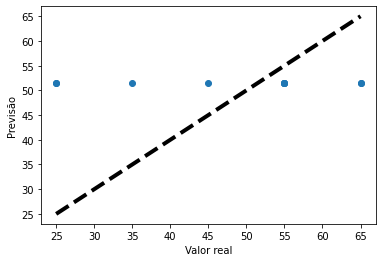

In [14]:
from sklearn.metrics import mean_squared_error

y_verdadeiro = y_teste_data
y_previsao = modelo_baseline.predict(X_teste_data)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo baseline foi de {RMSE} anos.")

fig, ax = plt.subplots()
ax.scatter(y_verdadeiro, y_previsao)
ax.plot([y_verdadeiro.min(), y_verdadeiro.max()], [y_verdadeiro.min(), y_verdadeiro.max()], 'k--', lw=4)
ax.set_xlabel('Valor real')
ax.set_ylabel('Previsão')
plt.show()

- Testando para o dataframe do arquivo ***"data_artigo.csv"***:

In [15]:
y_verdadeiro_art = y_teste_data_art
y_previsao_art = modelo_baseline.predict(X_teste_data_art)

RMSE_art = mean_squared_error(y_verdadeiro_art, y_previsao_art, squared=False)

print(f"O RMSE do modelo baseline foi de {RMSE_art} anos.")

O RMSE do modelo baseline foi de 10.205880657738458 anos.


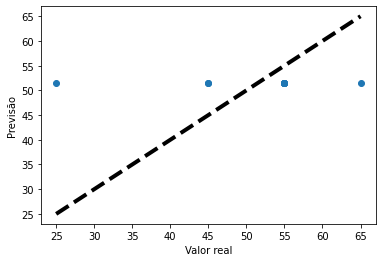

In [16]:
ig, ax = plt.subplots()
ax.scatter(y_verdadeiro_art, y_previsao_art)
ax.plot([y_verdadeiro_art.min(), y_verdadeiro_art.max()], [y_verdadeiro_art.min(), y_verdadeiro_art.max()], 'k--', lw=4)
ax.set_xlabel('Valor real')
ax.set_ylabel('Previsão')
plt.show()

---

### <a id="vizinhos">Tarefa 2 - k vizinhos mais próximos (k-NN)


In [17]:
# Relembrando o nome das variáveis do data.csv
# observe que usamos o .values aqui, pois queremos apenas os valores
# X_treino_data = df_treino_data.reindex(FEATURES, axis=1).values
# y_treino_data = df_treino_data.reindex(TARGET, axis=1).values
# X_teste_data = df_teste_data.reindex(FEATURES, axis=1).values
# y_teste_data = df_teste_data.reindex(TARGET, axis=1).values

# Relembrando o nome das variáveis do data.art.cvs
# observe que usamos o .values aqui, pois queremos apenas os valores
# X_treino_data_art = df_treino_data_art.reindex(FEATURES_art, axis=1).values
# y_treino_data_art = df_treino_data_art.reindex(TARGET_art, axis=1).values
# X_teste_data_art = df_teste_data_art.reindex(FEATURES_art, axis=1).values
# y_teste_data_art = df_teste_data_art.reindex(TARGET_art, axis=1).values

Proponho seguirmos a mesma ordem de raciocínio utilizada nos itens anteriores; 

1- Treinar;

2- Testar e produzir o RMSE para ver se é um bom método;

3- Determinando a quantidade ideal de vizinhos (Testando os Hiperparâmetros);

4- Posteriormente comparar entre os dataframes (data.csv e data_artigo.csv);

5- Comparar o RMSE do K-NN com o dos outros modelos; (posteriormente);

- 1 - Treinando o K-NN para o dataframe do arquivo ***"data.csv"***;

In [18]:
from sklearn.neighbors import KNeighborsRegressor

# cria o modelo
modelo_knn = KNeighborsRegressor()

# treina o modelo
modelo_knn.fit(X_treino_data, y_treino_data)

# realiza uma previsão usando o modelo treinado
previsao = modelo_knn.predict(X_teste_data)
print(previsao)

[[45.]
 [47.]
 [59.]
 [47.]
 [49.]
 [51.]
 [53.]
 [57.]
 [53.]
 [53.]]


- 2 - Testando o K-NN para o dataframe do arquivo ***"data.csv"***;

In [19]:
from sklearn.metrics import mean_squared_error
#aqui estamos testando o modelo produzindo uma previsão e medindo o RMSE da previsão
y_verdadeiro1 = y_teste_data
y_previsao1 = modelo_knn.predict(X_teste_data)

RMSE = mean_squared_error(y_verdadeiro1, y_previsao1, squared=False)

print(f"O RMSE do modelo k-NN foi de {RMSE} anos.")

O RMSE do modelo k-NN foi de 13.6088206689632 anos.


- 3- Determinando a quantidade ideal de vizinhos para o ***"data.csv"*** (Testando os Hiperparâmetros);

In [20]:
NUM_VIZINHOS = [1, 5, 10, 25, 50, 100]
#Aqui vamos testar valores diferentes de k (além do padrão de 5), para ver qual seria o melhor número de vizinhos para produzir o melhor RMSE 
for n in NUM_VIZINHOS:
    modelo_knn = KNeighborsRegressor(n_neighbors=n)

    modelo_knn.fit(X_treino_data, y_treino_data)

    y_verdadeiro1 = y_teste_data
    y_previsao1 = modelo_knn.predict(X_teste_data)
    RMSE = mean_squared_error(y_verdadeiro1, y_previsao1, squared=False)
    print(f"O RMSE do modelo k-NN usando k={n} foi de {RMSE} anos.")

O RMSE do modelo k-NN usando k=1 foi de 17.60681686165901 anos.
O RMSE do modelo k-NN usando k=5 foi de 13.6088206689632 anos.
O RMSE do modelo k-NN usando k=10 foi de 13.914021704740868 anos.
O RMSE do modelo k-NN usando k=25 foi de 14.127986409959487 anos.
O RMSE do modelo k-NN usando k=50 foi de 14.658512885009856 anos.
O RMSE do modelo k-NN usando k=100 foi de 14.579437574886077 anos.


- 1 - Treinando o K-NN para o dataframe do arquivo ***"data_artigo.csv"***;

In [21]:
from sklearn.neighbors import KNeighborsRegressor

# cria o modelo
modelo_knn = KNeighborsRegressor()

# treina o modelo
modelo_knn.fit(X_treino_data_art, y_treino_data_art)

# realiza uma previsão usando o modelo treinado
previsao_art = modelo_knn.predict(X_teste_data_art)
print(previsao_art)

[[51.]
 [57.]
 [53.]
 [55.]
 [51.]
 [53.]
 [55.]
 [43.]
 [49.]
 [51.]]


- 2 - Testando o K-NN para o dataframe do arquivo ***"data_artigo.csv"***;

In [22]:
from sklearn.metrics import mean_squared_error
#aqui estamos testando o modelo produzindo uma previsão e medindo o RMSE da previsão
y_verdadeiro2 = y_teste_data_art
y_previsao2 = modelo_knn.predict(X_teste_data_art)

RMSE = mean_squared_error(y_verdadeiro2, y_previsao2, squared=False)

print(f"O RMSE do modelo k-NN foi de {RMSE} anos.")

O RMSE do modelo k-NN foi de 11.661903789690601 anos.


- 3- Determinando a quantidade ideal de vizinhos para o ***"data_artigo.csv"*** (Testando os Hiperparâmetros);

In [23]:
NUM_VIZINHOS = [1, 5, 10, 25, 50, 100]
#Aqui vamos testar valores diferentes de k (além do padrão de 5), para ver qual seria o melhor número de vizinhos para produzir o melhor RMSE 
for n in NUM_VIZINHOS:
    modelo_knn = KNeighborsRegressor(n_neighbors=n)

    modelo_knn.fit(X_treino_data_art, y_treino_data_art)

    y_verdadeiro2 = y_teste_data_art
    y_previsao2 = modelo_knn.predict(X_teste_data_art)
    RMSE = mean_squared_error(y_verdadeiro2, y_previsao2, squared=False)
    print(f"O RMSE do modelo k-NN usando k={n} foi de {RMSE} anos.")

O RMSE do modelo k-NN usando k=1 foi de 12.24744871391589 anos.
O RMSE do modelo k-NN usando k=5 foi de 11.661903789690601 anos.
O RMSE do modelo k-NN usando k=10 foi de 10.620734437881403 anos.
O RMSE do modelo k-NN usando k=25 foi de 10.080476179228837 anos.
O RMSE do modelo k-NN usando k=50 foi de 10.250658515432068 anos.
O RMSE do modelo k-NN usando k=100 foi de 10.198529305738155 anos.


- 4- Posteriormente comparar entre os dataframes (data.csv e data_artigo.csv)

A diferença entre os dataframes continua sendo baixa data.csv = 13.6 anos e o data_artivo.csv = 11.6 anos.

O melhor número de vizinhos para data.csv = 5 e para o data_artivo.csv = 25 (considerando o melhor RMSE).

---

### <a id="linear">Tarefa 3 - Regressão Linear

#### Treinando um modelo linear para os datasets:

- Treinando para o dataframe do arquivo ***"data.csv"***: 

In [24]:
from sklearn.linear_model import LinearRegression

# cria o modelo
modelo_linear_data = LinearRegression()

# treina o modelo
modelo_linear_data.fit(X_treino_data, y_treino_data)

# realiza uma previsão usando o modelo treinado
previsao_data = modelo_linear_data.predict(X_teste_data)
print(previsao_data)

[[48.93143127]
 [56.90916389]
 [56.84489212]
 [47.08586348]
 [44.34850338]
 [62.32849594]
 [49.72741549]
 [55.26228612]
 [52.32362282]
 [56.02821142]]


In [25]:
y_verdadeiro_data = y_teste_data
y_previsao_data = modelo_linear_data.predict(X_teste_data)

RMSE_data2 = mean_squared_error(y_verdadeiro_data, y_previsao_data, squared=False)

print(f"O RMSE do modelo linear foi de {RMSE_data2} anos")

O RMSE do modelo linear foi de 17.661276151490007 anos


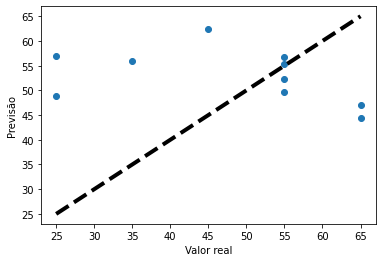

In [26]:
fig, ax = plt.subplots()
ax.scatter(y_verdadeiro_data, y_previsao_data)
ax.plot([y_verdadeiro_data.min(), y_verdadeiro_data.max()], [y_verdadeiro_data.min(), y_verdadeiro_data.max()], 'k--', lw=4)
ax.set_xlabel('Valor real')
ax.set_ylabel('Previsão')
plt.show()

> O valor de RMSE do caso linear (no caso dos genes identificados como relevantes no bloco anterior) foi maior do que aquele obtido a partir da previsão de baseline, ou seja, obtivemos uma piora na performance de predição. Normalmente, o RMSE do modelo linear demonstraria um valor menor em comparação ao valor de RMSE do modelo baseline, implicando em uma melhora, mas curiosamente, o caso oposto ocorreu. Isso pode ser por conta dos valores quais estamos trabalhando no o *dataset* escolhido. 

- Treinando para o dataframe do arquivo ***"data_artigo.csv"***: 

In [27]:
# cria o modelo
modelo_linear_art = LinearRegression()

# treina o modelo
modelo_linear_art.fit(X_treino_data_art, y_treino_data_art)

# realiza uma previsão usando o modelo treinado
previsao_art2 = modelo_linear_art.predict(X_teste_data_art)
print(previsao_art2)

[[53.18572151]
 [55.83297402]
 [48.85973193]
 [48.68125273]
 [50.75135134]
 [51.18883681]
 [52.40139163]
 [49.50503731]
 [54.42263743]
 [51.47477938]]


In [28]:
y_verdadeiro_art2 = y_teste_data_art
y_previsao_art2 = modelo_linear_art.predict(X_teste_data_art)

RMSE_art2 = mean_squared_error(y_verdadeiro_art2, y_previsao_art2, squared=False)

print(f"O RMSE do modelo linear foi de {RMSE_art2} anos")

O RMSE do modelo linear foi de 9.496874730058185 anos


> Já nesse caso, obtivemos o resultado normalmente esperado, no qual um valor menor de RMSE foi observado no caso do modelo linear (9.496874730058186 anos), enquanto o RMSE do modelo baseline teve um valor maior (10.205880657738458 anos.). Portanto, no caso do dataset contendo os genes que possuem sua expressão modificada em função do tempo confirmadada de acordo com a literatura, o modelo linear se prova um pouco mais eficaz.

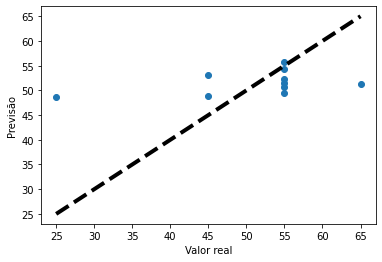

In [29]:
ig, ax = plt.subplots()
ax.scatter(y_verdadeiro_art2, y_previsao_art2)
ax.plot([y_verdadeiro_art2.min(), y_verdadeiro_art2.max()], [y_verdadeiro_art2.min(), y_verdadeiro_art2.max()], 'k--', lw=4)
ax.set_xlabel('Valor real')
ax.set_ylabel('Previsão')
plt.show()

###
#### Normalizando os dados
Vamos utilizar a normalização pelo mínimo e máximo (função `MinMaxScaler`).

- Para o dataframe do arquivo ***"data.csv"***: 

In [30]:
from sklearn.preprocessing import MinMaxScaler

normalizador_x = MinMaxScaler()
normalizador_y = MinMaxScaler()

normalizador_x.fit(X_treino_data)
normalizador_y.fit(y_treino_data)

MinMaxScaler()

In [31]:
# Ajustando o modelo:

from sklearn.linear_model import LinearRegression

# cria o modelo
modelo_linear_dn = LinearRegression()

# treina o modelo
modelo_linear_dn.fit(
    normalizador_x.transform(X_treino_data),
    normalizador_y.transform(y_treino_data),
)

# realiza uma previsão usando o modelo treinado
previsao1 = modelo_linear_dn.predict(normalizador_x.transform(X_treino_data))
previsao1 = normalizador_y.inverse_transform(previsao1)
print(previsao1)

[[55.33348849]
 [50.56341882]
 [46.85602764]
 [57.26211348]
 [47.31902063]
 [47.33612646]
 [54.71777868]
 [53.25793546]
 [60.27077979]
 [48.40420482]
 [55.89909326]
 [54.98353248]
 [54.3637402 ]
 [42.73383143]
 [50.45913773]
 [60.82667746]
 [53.7005485 ]
 [51.96597024]
 [56.35267631]
 [48.78786749]
 [61.26684892]
 [65.49582325]
 [51.08207143]
 [51.74953087]
 [57.36052171]
 [54.34895764]
 [51.31097155]
 [48.48306834]
 [50.49108198]
 [55.27757938]
 [46.86223803]
 [46.00098949]
 [55.49998148]
 [57.14165369]
 [45.66165884]
 [39.89626961]
 [55.00079756]
 [50.67888828]
 [51.19272933]
 [56.42431445]
 [47.08498729]
 [44.7411305 ]
 [44.54086476]
 [51.82844299]
 [47.91670639]
 [45.76728397]
 [51.83031631]
 [55.4488751 ]
 [50.33742961]
 [46.59875638]
 [49.07081977]
 [60.34143641]
 [47.90615939]
 [50.38411925]
 [43.92608637]
 [56.96287225]
 [61.1623197 ]
 [49.05882292]
 [58.14725778]
 [47.59226519]
 [50.97587996]
 [50.28960122]
 [48.2543825 ]
 [53.66408921]
 [60.25552623]
 [49.17444948]
 [46.06349

In [32]:
from sklearn.metrics import mean_squared_error

y_verdadeiro = y_teste_data
y_previsao_n = modelo_linear_dn.predict(normalizador_x.transform(X_teste_data))
y_previsao_n = normalizador_y.inverse_transform(y_previsao_data)

RMSE_dn = mean_squared_error(y_verdadeiro, y_previsao_n, squared=False)

print(f"O RMSE do modelo linear foi de {RMSE_dn} anos.")

O RMSE do modelo linear foi de 2107.00778539594 anos.


###
- Para o dataframe do arquivo ***"data_artigo.csv"***:

In [33]:
normalizador_x = MinMaxScaler()
normalizador_y = MinMaxScaler()

normalizador_x.fit(X_treino_data_art)
normalizador_y.fit(y_treino_data_art)

MinMaxScaler()

In [34]:
# Ajustando o modelo:

# cria o modelo
modelo_linear_artn = LinearRegression()

# treina o modelo
modelo_linear_artn.fit(
    normalizador_x.transform(X_treino_data_art),
    normalizador_y.transform(y_treino_data_art),
)

# realiza uma previsão usando o modelo treinado
previsao2 = modelo_linear_artn.predict(normalizador_x.transform(X_treino_data_art))
previsao2 = normalizador_y.inverse_transform(previsao2)
print(previsao2)

[[49.81214409]
 [48.65941644]
 [49.14751132]
 [52.81596816]
 [50.86518625]
 [51.28601586]
 [48.61021607]
 [49.97538721]
 [56.01091417]
 [50.2497385 ]
 [50.35492933]
 [44.1808967 ]
 [57.8244508 ]
 [51.42875806]
 [50.48611827]
 [52.27575694]
 [55.09980666]
 [47.94314813]
 [50.44665653]
 [50.41707531]
 [51.16673913]
 [52.46515677]
 [49.38523758]
 [48.24995462]
 [46.28738645]
 [48.60536523]
 [59.78798053]
 [51.6219699 ]
 [52.93627715]
 [53.23951225]
 [54.56367552]
 [52.45716998]
 [50.00398209]
 [49.43680644]
 [54.17732222]
 [53.12778833]
 [49.70481079]
 [51.78495573]
 [52.45136837]
 [47.83893685]
 [51.94085712]
 [50.34047047]
 [50.26163717]
 [49.36208117]
 [52.68213591]
 [50.11727791]
 [50.71475275]
 [48.96742329]
 [52.43077147]
 [52.22154839]
 [55.4875378 ]
 [51.0287955 ]
 [52.56673453]
 [48.27168746]
 [52.26173171]
 [53.44774815]
 [47.20192605]
 [47.87716325]
 [47.97424944]
 [49.83835519]
 [44.6552346 ]
 [48.49059542]
 [49.28605787]
 [51.69788579]
 [51.99350142]
 [52.09889697]
 [50.18567

In [35]:
from sklearn.metrics import mean_squared_error

y_verdadeiro = y_teste_data_art
y_previsao_artn = modelo_linear_artn.predict(normalizador_x.transform(X_teste_data_art))
y_previsao_artn = normalizador_y.inverse_transform(y_previsao_artn)

RMSE_artn = mean_squared_error(y_verdadeiro, y_previsao_artn, squared=False)

print(f"O RMSE do modelo linear foi de {RMSE_artn} anos.")

O RMSE do modelo linear foi de 9.496874730058188 anos.


----